In [3]:
import pyximport
pyximport.install()
import numpy as np
from FC_Layer import *
from Relu_Layer import *
from Softmax_Layer import *
from Pooling_Layer import *
from Convolution_Layer import *
from Load_Data import *
from Flatten import *
from NN import *
from NN_Trainer import *

In [4]:
data = get_CIFAR10_data()
np.random.seed(7)
lr = 0.001
reg = 0.1
ws = 0.1

In [5]:
cnv = Convolution_Layer((3,32,32), 32, 3, 1, ws)
relu = Relu_Layer()
cnv2 = Convolution_Layer((32,32,32), 32, 1, 1, ws)
relu2 = Relu_Layer()
pool = Pooling_Layer(2,2,2)

cnv3 = Convolution_Layer((32,16,16), 64, 3, 1, ws)
relu3 = Relu_Layer()
cnv4 = Convolution_Layer((64,16,16), 64, 1, 1, ws)
relu4 = Relu_Layer()
pool2 = Pooling_Layer(2,2,2)

flt = Flatten()

fc1 = FC_Layer(4096,2048, ws, False, 0)
relu5 = Relu_Layer()

fc2 = FC_Layer(2048,1024, ws, False, 0)
relu6 = Relu_Layer()

fc3 = FC_Layer(1024,512, ws, False, 0)
relu7 = Relu_Layer() 

fc4 = FC_Layer(512, 10, ws, False, 0)
sftmax = Softmax_Layer()

In [6]:
model = NN(0)

model.add_Layer(cnv, lr)
model.add_Layer(relu)
model.add_Layer(cnv2, lr)
model.add_Layer(relu2)
model.add_Layer(pool)

model.add_Layer(cnv3, lr)
model.add_Layer(relu3)
model.add_Layer(cnv4, lr)
model.add_Layer(relu4)
model.add_Layer(pool2)

model.add_Layer(flt)

model.add_Layer(fc1, lr)
model.add_Layer(relu5)

model.add_Layer(fc2, lr)
model.add_Layer(relu6)

model.add_Layer(fc3, lr)
model.add_Layer(relu7)

model.add_Layer(fc4, lr)
model.add_Layer(sftmax)

In [7]:
solver = NN_Trainer(model, data,
                num_epochs=100, batch_size=250,
                verbose= True)
solver.train()

('Epoch', 1, '/', 100)---------------------------------------] -0.5% ...Tr Loss: 1.601073
(' train acc ', 0.426, ' train loss ', 1.60107, ' val acc', 0.437, ' val loss ', 1.57233)
('Epoch', 2, '/', 100)---------------------------------------] -0.5% ...Tr Loss: 1.35292
(' train acc ', 0.558, ' train loss ', 1.35292, ' val acc', 0.506, ' val loss ', 1.29469)
('Epoch', 3, '/', 100)---------------------------------------] -0.5% ...Tr Loss: 1.22709
(' train acc ', 0.579, ' train loss ', 1.22709, ' val acc', 0.577, ' val loss ', 1.24873)
('Epoch', 4, '/', 100)---------------------------------------] -0.5% ...Tr Loss: 1.11847
(' train acc ', 0.586, ' train loss ', 1.1184, ' val acc', 0.567, ' val loss ', 1.19413)
('Epoch', 5, '/', 100)---------------------------------------] -0.5% ...Tr Loss: 1.10459
(' train acc ', 0.627, ' train loss ', 1.1045, ' val acc', 0.611, ' val loss ', 1.11532)
('Epoch', 6, '/', 100)---------------------------------------] -0.5% ...Tr Loss: 0.95583
(' train acc ', 0

In [16]:
y_test_pred = np.argmax(model.loss(data["X_test"]), axis = 1)

print 'ACCR', (y_test_pred == data["y_test"]).mean()

ACCR 0.784


In [18]:
for i in range(10):
    print i, np.sum( np.logical_and(y_test_pred == data["y_test"][:3000], data["y_test"][:3000] == i)) / float(np.sum(data["y_test"][:3000] == i)) 

 0 0.7859531772575251
1 0.9303135888501742
2 0.5974842767295597
3 0.5627118644067797
4 0.745819397993311
5 0.696551724137931
6 0.9153094462540716
7 0.8356643356643356
8 0.8354430379746836
9 0.9405940594059405


In [20]:
import matplotlib.pyplot as plt



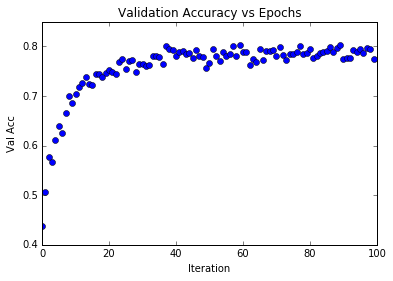

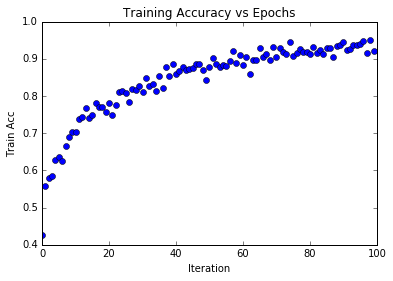

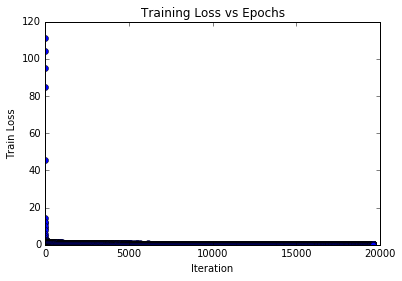

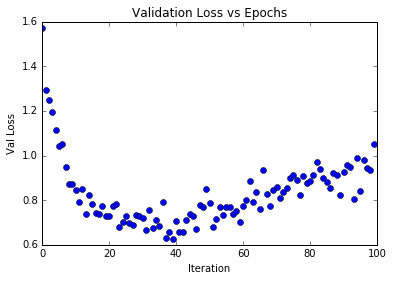

In [21]:
plt.plot(solver.val_acc_history, 'o')
plt.title('Validation Accuracy vs Epochs')
plt.xlabel('Iteration')
plt.ylabel('Val Acc')
plt.show()

plt.plot(solver.train_acc_history, 'o')
plt.title('Training Accuracy vs Epochs')
plt.xlabel('Iteration')
plt.ylabel('Train Acc')
plt.show()

plt.plot(solver.loss_history, 'o')
plt.title('Training Loss vs Epochs')
plt.xlabel('Iteration')
plt.ylabel('Train Loss')
plt.show()

plt.plot(solver.val_loss, 'o')
plt.title('Validation Loss vs Epochs')
plt.xlabel('Iteration')
plt.ylabel('Val Loss')
plt.show()